In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


df = pd.read_csv('Hotel_Reservations.csv')
df.head()
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [3]:
df.duplicated().sum()

np.int64(0)

In [10]:
df_cleaned = df.drop(columns=['Booking_ID'])
df_cleaned.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### One hot encoding is applied on all the categorical columns in the dataset

In [11]:
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols)
df_cleaned.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,2018,11,6,0,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,2018,2,28,0,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,2018,5,20,0,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,2018,4,11,0,...,False,False,False,False,False,False,False,False,False,True


In [12]:
encoder = LabelEncoder()
df_cleaned['booking_status'] = encoder.fit_transform(df_cleaned['booking_status'])
df_cleaned.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,2018,11,6,0,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,2018,2,28,0,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,2018,5,20,0,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,2018,4,11,0,...,False,False,False,False,False,False,False,False,False,True


In [13]:
X = df_cleaned.drop(columns=['booking_status'])
y = df_cleaned['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Standardization of the features is done and they're put in arrays

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Now, let's initialize the 3 models that we're gonna be using for classification

In [15]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(kernel='linear', random_state=42)

### Training Models and making predictions (classification)

In [ ]:
log_reg.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)
svm_clf.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [17]:
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_rf = rf_clf.predict(X_test_scaled)
y_pred_svm = svm_clf.predict(X_test_scaled)

### Finding out which model is the most accurate at classification

Logistic Regression Accuracy: 80.72%
Random Forest Accuracy: 90.24%
SVM Accuracy: 80.46%


C:\Users\DYNABOOK\AppData\Local\Temp\ipykernel_22760\2906887047.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette='viridis')


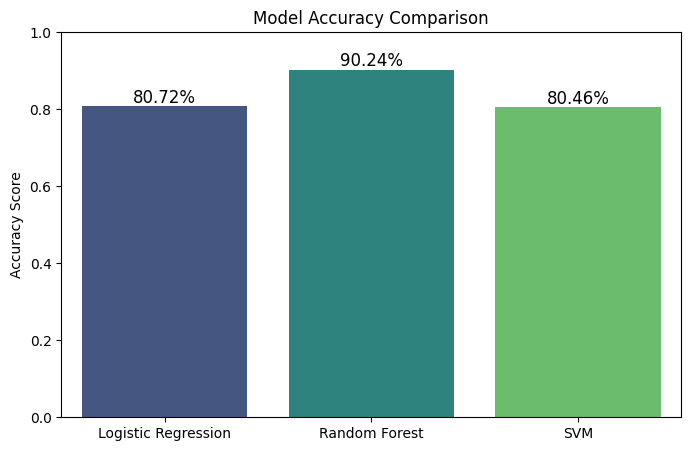

In [ ]:
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Logistic Regression Accuracy: {accuracy_log:.2%}")
print(f"Random Forest Accuracy: {accuracy_rf:.2%}")
print(f"SVM Accuracy: {accuracy_svm:.2%}")

models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracy_scores = [accuracy_log, accuracy_rf, accuracy_svm]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', fontsize=12)
plt.show()
